In [50]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [63]:
def kernel(x1,x2,l):
    return np.exp(-1.0/l**2*(x1 - x2[:, None])**2)

def evalGP(X,A,l,x):
    K_xX = kernel(x,X,l)
    mu = K_xX.T @ A
    
    return mu

In [93]:
# Create Random fixed points
n_samples = 11
X = np.linspace(0,10,n_samples)
Y = -np.random.uniform(size=n_samples)

# Compute and invert the GP Kernel Matrix
l = 1
K_XX = kernel(X,X,l)
A = np.linalg.inv(K_XX) @ Y

# Evaluate the GP on the data x
x = np.linspace(-5,15,200)
y = evalGP(X,A,x)

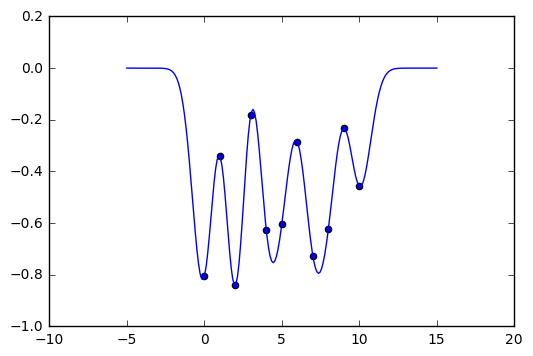

In [94]:
plt.hold(True)
plt.scatter(X,Y)
plt.plot(x,y)
plt.show()

In [92]:
# Evaluate the GP at one point
print(evalGP(X,A,1.5))

[-0.58692704]
